 ## <center>Graduate Rotational Internship Program</center> 
##     <br> Author :- Sai Ram.K <br>
## <center>     Task-1 <br><br> Study Hours -Linear regression
 

## Importing necessary libraries <br>
Numpy --> For numerical analysis<br>
Pandas --> For various functions from loading the csv file to operations performed<br>
matplotlib --> For all the visualization<br>
sklearn's linear regression --> For performing Regression on the given data<br>

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

## Reading the data<br>
We read the data using pandas's read_csv function and pass the URL.<br>
df.head() is a function that displays the first few rows and all columns.<br>

In [3]:
df = pd.read_csv("http://bit.ly/w-data")
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Visualizing the Hours and Scores

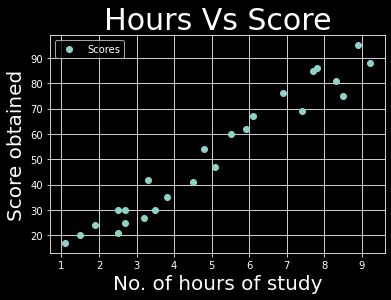

In [29]:
from matplotlib.pyplot import figure
df.plot(x='Hours',y='Scores',style='o')
#plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('No. of hours of study',size = 20) 
plt.ylabel('Score obtained',size = 20)
plt.title('Hours Vs Score',size = 30)
plt.grid(True)

## Checking for Missing Values

In [4]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

## Feature Selection

In [5]:
from sklearn.model_selection import train_test_split

#X = df[['Hours']]
#y = df[['Scores']]
X = df.iloc[:,:-1].values ; y = df.iloc[:,1].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

split = [X_train,X_test,y_train,y_test]
split_names = ['X_train','X_test','y_train','y_test']
for x,y in zip(split,split_names):
    print(f"{y}'s shape is --> {x.shape}")


X_train's shape is --> (20, 1)
X_test's shape is --> (5, 1)
y_train's shape is --> (20,)
y_test's shape is --> (5,)


## Training the Model
<br>We create a instance named model so that we can use all the methods that are present in LinearRegression().<br>
We then fit the model with respect to the train data from the previous train_test_split.<br>

In [6]:
model = LinearRegression()
model.fit(X_train,y_train)
print('Model has successfully been fit.')

Model has successfully been fit.


## Regression Line
<br> We now know that the regression line has a slope M and intercept C and assumes the form of Y = M*X + C equation.<br>
We are now going to visualize the regression line and how it fits the points.

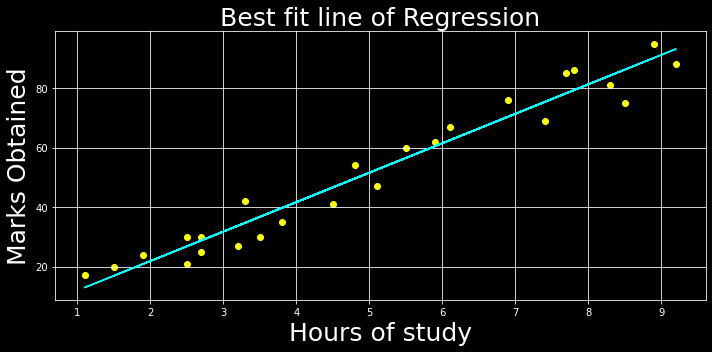

In [14]:
# y = mx + C
line = model.coef_ *X + model.intercept_
fig, axes = plt.subplots(1,1, figsize = (10,5))
plt.style.use('dark_background')
plt.scatter(X,y,color='yellow',alpha=1)
_=plt.plot(X,line,color='cyan',alpha=1)
plt.xlabel('Hours of study',size=25)
plt.ylabel('Marks Obtained',size=25)
plt.title('Best fit line of Regression',size=25)
plt.grid(True)
fig.tight_layout()
plt.show()


## Testing on new data
<br> The fit model is now being tested on new data and it would further be evaluated as to how much accurate it is.

In [7]:
y_pred = model.predict(X_test) 

In [11]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


As you can see the above DataFrame shows the difference between the actual and predicted values. 
<br> We however interpret this in terms of an evaluation metric named as :-
    <br>1.Mean Absolute Error<br>
        2.Mean Squared Error<br>
        3.Root Mean Squared Error<br>

In [12]:
from sklearn import metrics  
import math
print('Mean Absolute Error = ', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error = ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE = ',math.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error =  4.183859899002975
Mean Squared Error =  21.5987693072174
RMSE =  4.6474476121003665


## Prediction for required question i.e 9.25 hrs/day

In [16]:
x = [[float(input("Enter hours studied per day : "))]]
y = round(model.predict(x)[0],2)
print(f"Your score for studying for {x[0][0]} hours a day = {y}/100")

Enter hours studied per day : 9.25
Your score for studying for 9.25 hours a day = 93.69/100
